In [1]:
import scipy as sc
import numpy as np
import scipy.stats as sct
sc.version.full_version 
import matplotlib.pyplot as plt

#b. Find P(X>=50)
# loc = mean
# Scale = standard deviation
# sct.norm.sf(x=10,loc=0,scale=1)
sct.norm.isf(q=0,loc=0,scale=1)

inf

In [2]:
def ROC_Curve(alp):
    s0=1
    s1=2
    # Probability of False Alarm = alp
    
    q_inv=sct.norm.isf(q=alp/2,loc=0,scale=s0)
    ga_p=s0*s0*(q_inv*q_inv)
    
    # Probability of detection
    q_pd=sct.norm.sf(x=(np.sqrt(ga_p)/s1),loc=0,scale=s1)
    Pd= 2*q_pd
    return Pd

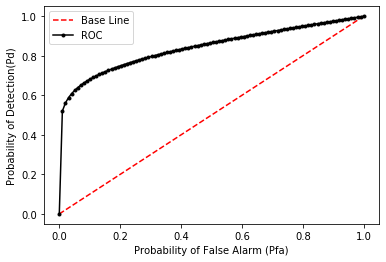

In [3]:
k=np.linspace(0,1,100)
# ROC =Receiver Operating Statistics
ans=[]
for i in k:
    ans.append(ROC_Curve(i))
plt.plot(k,k,label='Base Line',c='r',linestyle='dashed')
plt.plot(k,ans,label='ROC',c='k',marker='.')
plt.xlabel("Probability of False Alarm (Pfa)")
plt.ylabel("Probability of Detection(Pd)")
plt.legend()
plt.show()

In [17]:
s0=1
s1=2

alp=0.4
q_inv=sct.norm.isf(q=alp/2,loc=0,scale=s0)
ga_p=s0*s0*(q_inv*q_inv)
print("ga_p=",ga_p)

# Probability of detection
q_pd=sct.norm.sf(x=(np.sqrt(ga_p)/s1),loc=0,scale=s1)
Pd= 2*q_pd
print("Pd=",Pd)

ga_p= 0.7083263008007937
Pd= 0.8333513498891151


In [19]:
# Testing a sample
print(Pd)
print(alp)

# At t= 0 s
sample=0.5
if(abs(sample)>np.sqrt(ga_p)):
    print("Accept Alternate Hypothesis H1")
    print("Most Probably belongs to Standard Deviation s1 =",s1)
else:
    print("Accept Null Hypothesis H0")
    print("Most Probably belongs to Standard Deviation s0 =",s0)

0.8333513498891151
0.4
Accept Null Hypothesis H0
Most Probably belongs to Standard Deviation s0 = 1


In [20]:
# At t = 2s
sample=1
if(abs(sample)>np.sqrt(ga_p)):
    print("Accept Alternate Hypothesis H1")
    print("Most Probably belongs to Standard Deviation s1 =",s1)
else:
    print("Accept Null Hypothesis H0")
    print("Most Probably belongs to Standard Deviation s0 =",s0)

Accept Alternate Hypothesis H1
Most Probably belongs to Standard Deviation s1 = 2


In [21]:
# At t = 4s
sample=-3
if(abs(sample)>np.sqrt(ga_p)):
    print("Accept Alternate Hypothesis H1")
    print("Most Probably belongs to Standard Deviation s1 =",s1)
else:
    print("Accept Null Hypothesis H0")
    print("Most Probably belongs to Standard Deviation s0 =",s0)

Accept Alternate Hypothesis H1
Most Probably belongs to Standard Deviation s1 = 2


0.8416212335729142


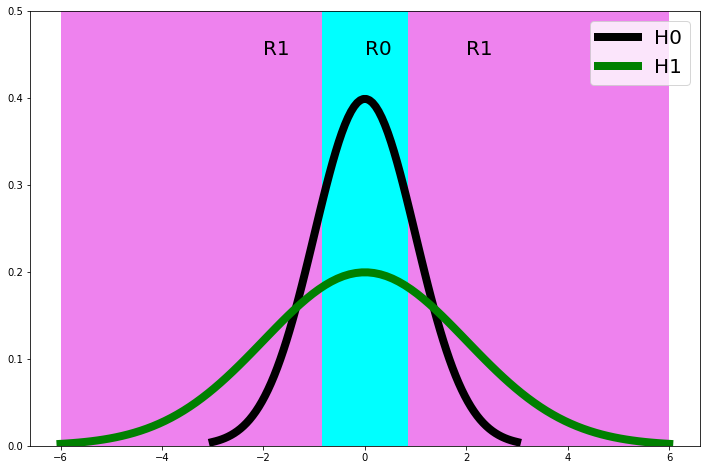

In [6]:
import scipy.stats as stats
import math
t=np.sqrt(ga_p)
print(t)
mu=0
plt.figure(figsize=(12,8))
plt.ylim(0,.5)
x = np.linspace(mu - 3*s0, mu + 3*s0, 100)
plt.plot(x, stats.norm.pdf(x, mu, s0),label='H0',c='k',linewidth=8)
# plt.axvline(x=t,c='r',label="Right Side R1")
# plt.axvline(x=-t,c='r',label="Left Side R1")
x = np.linspace(mu - 3*s1, mu + 3*s1, 100)
plt.plot(x, stats.norm.pdf(x, mu, s1),label='H1',c='g',linewidth=8)
# plt.fill_between(ga_p,6)
# plt.fill_between(ga_p, 0, y2=0, where=None, interpolate=False, step=None, hold=None, data=None)
plt.fill_betweenx(y=x, x1=-t, x2=t, where=None, step=None,  data=None,facecolor='cyan')
plt.fill_betweenx(y=x, x1=-6, x2=-t, where=None, step=None, data=None,facecolor='violet')
plt.fill_betweenx(y=x, x1=t, x2=6, where=None, step=None,  data=None,facecolor='violet')
plt.legend(fontsize=20)
plt.text(0, 0.45, 'R0', fontsize=20)
plt.text(2, 0.45, 'R1', fontsize=20)
plt.text(-2, 0.45, 'R1', fontsize=20)
plt.show()